In [141]:
import pandas as pd
import numpy as np
import re,pyperclip
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("hls")
sns.set_color_codes("muted")
%matplotlib inline

# Choix

In [142]:
typeResults="Principaux"
# typeResults="Complets"

repL4L="/Users/gilles/ownCloud/Recherche/Boye/HDR/Data/L4L/"
repIMM21=repL4L+"IMM21/"
fSwim=repIMM21+"IMM21-00-X-paradigmes-Swim1.csv"
fSwim=repIMM21+"IMM21-00-X-paradigmes-Swim1-StemSpace.csv"
fSwim=repIMM21+"IMM21-00-X-paradigmes-Swim2.csv"
fSwim=repIMM21+"IMM21-00-X-paradigmes-Swim2-StemSpace.csv"
fSwim=repIMM21+"IMM21-00-X-Morphomes-Swim1.csv"
fSwim=repIMM21+"IMM21-00-X-Morphomes-Swim1-StemSpace.csv"
fSwim=repIMM21+"IMM21-00-X-Morphomes-Swim2.csv"
fSwim=repIMM21+"IMM21-00-X-Morphomes-Swim2-StemSpace.csv"
# fSwim=repIMM21+"IMM21-01-X-paradigmes-Swim1.csv"
# fSwim=repIMM21+"IMM21-01-X-paradigmes-Swim1-StemSpace.csv"
# fSwim=repIMM21+"IMM21-01-X-paradigmes-Swim2.csv"
# fSwim=repIMM21+"IMM21-01-X-paradigmes-Swim2-StemSpace.csv"
# fSwim=repIMM21+"IMM21-01-X-Morphomes-Swim1.csv"
# fSwim=repIMM21+"IMM21-01-X-Morphomes-Swim1-StemSpace.csv"
# fSwim=repIMM21+"IMM21-01-X-Morphomes-Swim2.csv"
# fSwim=repIMM21+"IMM21-01-X-Morphomes-Swim2-StemSpace.csv"
fSwim=repIMM21+"IMM21-02-X-paradigmes-Swim1.csv"
fSwim=repIMM21+"IMM21-02-X-paradigmes-Swim1-StemSpace.csv"
fSwim=repIMM21+"IMM21-02-X-paradigmes-Swim2.csv"
fSwim=repIMM21+"IMM21-02-X-paradigmes-Swim2-StemSpace.csv"
fSwim=repIMM21+"IMM21-02-X-Morphomes-Swim1.csv"
fSwim=repIMM21+"IMM21-02-X-Morphomes-Swim1-StemSpace.csv"
fSwim=repIMM21+"IMM21-02-X-Morphomes-Swim2.csv"
fSwim=repIMM21+"IMM21-02-X-Morphomes-Swim2-StemSpace.csv"
# fSwim=repIMM21+"IMM21-00-X-paradigmes-Max.csv"
# fSwim=repIMM21+"IMM21-00-X-paradigmes-InterMax.csv"
# fControl=repL4L+"vlexique-Sampa.csv"
# fControl=repIMM21+"IMM21-00-X-paradigmes.csv"
fControl=repIMM21+"IMM21-01-X-paradigmes.csv"
# fControl=repIMM21+"IMM21-02-X-paradigmes.csv"


In [143]:
dfSwim=pd.read_csv(fSwim,sep=";",encoding="utf8")
dfControl=pd.read_csv(fControl,sep=";",encoding="utf8")

In [144]:
print dfControl.iloc[:,2:].count().sum()
print len(dfControl)

103623
6433


In [145]:
%store -r ordStemCells
cols=dfControl.columns.tolist()[2:]
if typeResults=="Principaux":
    cols=[c for c in cols if not ("ai" in c or "is" in c)]
    ordStemCells=[c for c in ordStemCells if c in cols]
# cols

In [146]:
neutralisationsNORD=(u"6û",u"9ê")
neutralisationsSUD=(u"e2o",u"E9O")
neutralisations=neutralisationsSUD

bdlexiqueIn = unicode(u"èò"+neutralisations[0])
bdlexiqueNum = [ord(char) for char in bdlexiqueIn]
neutreOut = unicode(u"EO"+neutralisations[1])
neutralise = dict(zip(bdlexiqueNum, neutreOut))

In [147]:
def recoder(chaine,table=neutralise):
    if type(chaine)==str:
        temp=unicode(chaine.decode('utf8')).translate(table)
        result=temp.encode('utf8')
    elif type(chaine)==unicode:
        result=chaine.translate(table)
    else:
        result=chaine
    return result

In [148]:
dierese={"j":"ij", "w":"uw","H":"yH","i":"ij","u":"uw","y":"yH"}

In [149]:
def checkFrench(prononciation):
    glide2voyelle={"j":"i","w":"u","H":"y"}
    if prononciation:
        if "," in prononciation:
            prononciations=prononciation.split(",")
            setPrononciations=set()
            for element in prononciations:
                setPrononciations.add(checkFrench(element))
            result=",".join(list(setPrononciations))
        else:
            result=recoder(prononciation)
            result=result.replace("Jj","J")
            m=re.match(ur"^(.*[^ieèEaOouy926êôâ])([jwH])$",result)
            if m:
                # print ("pb avec un glide final", prononciation)
                voyelle=glide2voyelle[m.group(2)]
                result=m.group(1)+voyelle
            m=re.match(ur"(.*[ptkbdgfsSvzZ][rl])([jwH])(.*)",result)
            if m:
                n=re.search(ur"[ptkbdgfsSvzZ][rl](wa|Hi|wê)",result)
                if not n:
                    glide=m.group(2)
                    result=m.group(1)+dierese[glide]+m.group(3)
            m=re.match(ur"(.*)([iuy])([ieEaOouyêâô].*)",result)
            if m:
                glide=m.group(2)
                result=m.group(1)+dierese[glide]+m.group(3)
            result=result.replace("jj","ij")
    else:
        result=prononciation
    return result

In [150]:
print checkFrench(u"aliJje")

aliJE


In [151]:
equals={}
differents={}
missings={}

def normalise(forme):
    result=recoder(forme)
    result=checkFrench(result)
    return result        

def compare(row):
    def compareForms(f1,f2):
        if normalise(f1)==normalise(f2):
            lEquals[c]=(f1,f2)
        else:
            lDifferents[c]=(f1,f2)
        return

    
    lexeme=row.lexeme
    if lexeme in dfSwim["lexeme"].tolist():
        lEquals=equals[lexeme]={}
        lDifferents=differents[lexeme]={}
        lMissings=missings[lexeme]={}
        swimRow=dfSwim[dfSwim.lexeme.str.contains("^"+lexeme+"$")]
        for c in cols:
            swimRowC=swimRow[c].values[0]
            if row[c]==row[c]:
                if swimRowC==swimRowC:
                    compareForms(row[c],swimRowC)
                else:
                    lMissings[c]=(row[c],swimRowC)
        return (lexeme,len(lEquals),len(lDifferents),len(lMissings))
    return (lexeme,np.nan,np.nan,np.nan)

In [152]:
dfResults=pd.DataFrame([[l,e,d,m] for l,e,d,m in dfControl.apply(compare,axis=1).values], columns="lexeme equal different missing".split(" "))

In [153]:
nbForms=dfResults["equal different missing".split(" ")].sum().sum()
nbForms

97542.0

In [154]:
print typeResults,fSwim.split("/")[-1],"vs",fControl.split("/")[-1]
# Paradigmes-Swim1: 43
# Paradigmes-Swim2: 92
# Morphomes-Swim1: 42
# Morphomes-Swim2: 92
ajustementsManuels=0
nbEqual=int(dfResults["equal"].sum())
nbDifferent=int(dfResults["different"].sum())
nbMissing=int(dfResults["missing"].sum())
print "formes identiques :",nbEqual,"=> %2.1f%%"%round(nbEqual/nbForms*100,1)
print "formes manquantes :",nbMissing,"=> %2.1f%%"%round(nbMissing/nbForms*100,1)
print "formes différentes :",nbDifferent,"=> %2.1f%%"%round(nbDifferent/nbForms*100,1)


Principaux IMM21-02-X-Morphomes-Swim2-StemSpace.csv vs IMM21-01-X-paradigmes.csv
formes identiques : 93569 => 95.9%
formes manquantes : 3821 => 3.9%
formes différentes : 152 => 0.2%


In [155]:
dfResults.count()

lexeme       6433
equal        6368
different    6368
missing      6368
dtype: int64

In [156]:
tEquals=[]
for k,v in equals.iteritems():
    for kk,vv in v.iteritems():
        tEquals.append("\t".join([k,kk,vv[0]]))
pyperclip.copy("\n".join(tEquals))

In [157]:
tMissings=[]
for k,v in missings.iteritems():
    for kk,vv in v.iteritems():
        tMissings.append("\t".join([k,kk,vv[0]]))
pyperclip.copy("\n".join(tMissings))

In [158]:
dfDiff=pd.DataFrame.from_dict(differents).T
for c in ordStemCells:
    if c not in dfDiff.columns:
        dfDiff[c]=np.NaN
dfDiff=dfDiff[ordStemCells]
dfDiff.to_pickle(fSwim.replace(".csv","-Diff-%s.pkl"%typeResults))
dfDiff.head()

,pi1S,pi2S,pi3S,pi1P,pi2P,pi3P,ii1S,ii2S,ii3S,ii1P,...,ps3P,pI2S,pI1P,pI2P,inf,pP,ppMS,ppMP,ppFS,ppFP
abaisser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abandonner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abasourdir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abattre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abdiquer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
dfDiff.dropna(thresh=1).to_csv(fSwim.replace(".csv","-Diff-%s.csv"%typeResults),encoding="utf8",sep=";")

In [160]:
%store -r pltCellColors
def colorerXTicks(gAX,fSize=12):
    xlabels=gAX.get_xticklabels()
    for xlabel in xlabels:
        xtext=xlabel.get_text()
        xlabel.set_backgroundcolor(pltCellColors[xtext])
        xlabel.set_family("monospace")

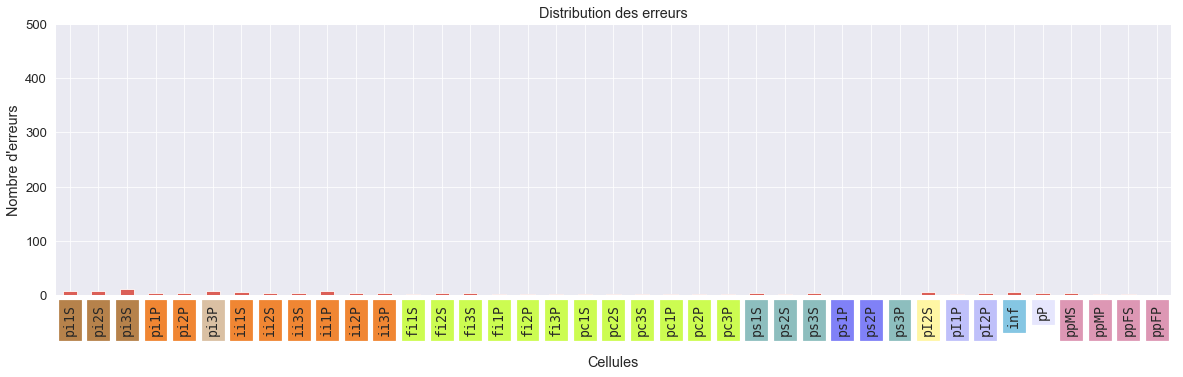

In [161]:
ax=dfDiff.count().plot(kind="bar")
# ax.set_xticklabels(ordStemCells)
ax.set_title("Distribution des erreurs")
ax.set_xlabel("\nCellules")
ax.set_ylabel("Nombre d'erreurs")
_=ax.set_ylim(0,500)
colorerXTicks(ax,fSize=10)
ax.figure.set_size_inches(20,5)
plt.savefig(fSwim.replace(".csv","-ErrDist-%s.pdf"%typeResults))

In [162]:
dfHyp0=pd.read_pickle(repIMM21+"IMM21-00-X-paradigmes-Max-Diff.pkl").count()
dfHyp1=pd.read_pickle(repIMM21+"IMM21-00-X-Morphomes-Swim2-StemSpace-Diff.pkl").count()

In [163]:
df=dfHyp0[ordStemCells].to_frame()
df.columns=["Vote majoritaire"]
df["Choix consensuel"]=dfHyp1[ordStemCells].to_frame()
df=df.reset_index()
df.head()

,index,Vote majoritaire,Choix consensuel
0,pi1S,74.0,46.0
1,pi2S,77.0,52.0
2,pi3S,61.0,52.0
3,pi1P,66.0,38.0
4,pi2P,73.0,48.0


In [164]:
dfMelted = pd.melt(df, id_vars=['index'],value_vars=['Vote majoritaire','Choix consensuel'])
dfMelted.columns=["case",u"Mode de sélection","nombre"]
# dfMelted

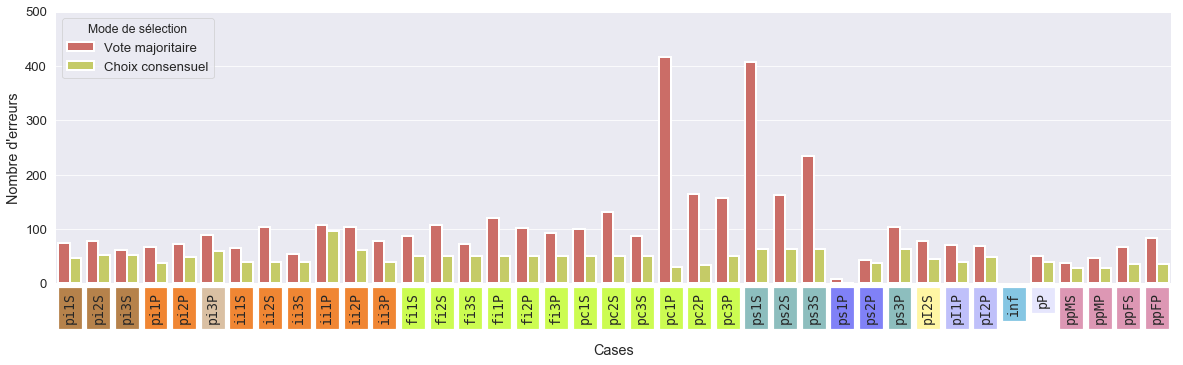

In [165]:
ax = sns.barplot(x="case", y="nombre", hue=u"Mode de sélection", data=dfMelted,linewidth=2)#,palette=["red","green"])
ax.set_xlabel("\nCases")
ax.set_ylabel("Nombre d'erreurs")
# ax.set_title("Distribution des erreurs en fonction des cases")
colorerXTicks(ax,fSize=10)
ax.tick_params(axis='x', labelrotation=90)
_=ax.set_ylim(0,500)
# _=ax.set_xlim("inf","is1P")
ax.figure.set_size_inches(20,5)
plt.savefig(repIMM21+"IMM21-00-DistErr-%s.pdf"%typeResults,dpi=300, bbox_inches = "tight")


In [166]:
nbEqualCorr=nbEqual
nbDifferentCorr=nbDifferent
nbMissingCorr=nbMissing

for k,v in differents.iteritems():
    for kk,vv in v.iteritems():
        if "," in vv[0] or "," in vv[1]:
            set1=set(vv[0].split(","))
            set2=set(vv[1].split(","))
            sEquals12=set1&set2
            equals12=",".join(sEquals12)
            sMissings12=set1-set2
            missings12=",".join(sMissings12)
            sDifferents12=set2-set1
            differents12=",".join(sDifferents12)
            # print ",".join([k,kk,"=",equals12,u"Ø",missings12,u"≠",differents12])
            nbEqualCorr+=len(sEquals12)
            nbDifferentCorr-=len(sEquals12)
            nbMissingCorr+=len(sMissings12)

In [167]:
%store -r resultats
lResultats=resultats[typeResults]
nControl=fControl.split("/")[-1]
if nControl not in lResultats:
    lResultats[nControl]={}
nSwim=fSwim.split("/")[-1]
if nSwim not in lResultats[nControl]:
    lResultats[nControl][nSwim]={}
lRes=lResultats[nControl][nSwim]
lRes["nb"]=nbForms
lRes["equal"]=nbEqualCorr
lRes["missing"]=nbMissingCorr
lRes["diff"]=nbDifferentCorr
lRes["precision"]=float(nbEqualCorr)/(nbEqualCorr+nbDifferentCorr)*100
lRes["recall"]=float(nbEqualCorr)/(nbEqualCorr+nbMissingCorr)*100


print typeResults,nSwim,"vs",nControl
print "formes identiques :",nbEqualCorr,"=> %2.1f%%"%round(nbEqualCorr/nbForms*100,1)
print "formes manquantes :",nbMissingCorr,"=> %2.1f%%"%round(nbMissingCorr/nbForms*100,1)
print "formes différentes :",nbDifferentCorr,"=> %2.1f%%"%round(nbDifferentCorr/nbForms*100,1)
print "précision : %2.1f%%"%(float(nbEqualCorr)/(nbEqualCorr+nbDifferentCorr)*100)
print "rappel : %2.1f%%"%(float(nbEqualCorr)/(nbEqualCorr+nbMissingCorr)*100)

print resultats

Principaux IMM21-02-X-Morphomes-Swim2-StemSpace.csv vs IMM21-01-X-paradigmes.csv
formes identiques : 93573 => 95.9%
formes manquantes : 3825 => 3.9%
formes différentes : 148 => 0.2%
précision : 99.8%
rappel : 96.1%
{'Complets': {}, 'Principaux': {'IMM21-01-X-paradigmes.csv': {'IMM21-02-X-Morphomes-Swim1-StemSpace.csv': {'missing': 7789, 'recall': 92.00964300369307, 'nb': 97542.0, 'equal': 89691, 'precision': 99.93092152908538, 'diff': 62}, 'IMM21-02-X-paradigmes-Swim1-StemSpace.csv': {'missing': 22087, 'recall': 77.35340257769484, 'nb': 97542.0, 'equal': 75442, 'precision': 99.98277118812537, 'diff': 13}, 'IMM21-02-X-paradigmes-Swim1.csv': {'missing': 25587, 'recall': 73.76687821032019, 'nb': 97542.0, 'equal': 71950, 'precision': 99.99305121256342, 'diff': 5}, 'IMM21-00-X-Morphomes-Swim1-StemSpace.csv': {'missing': 1704, 'recall': 98.16876585135194, 'nb': 93187.0, 'equal': 91348, 'precision': 99.85243159931353, 'diff': 135}, 'IMM21-00-X-Morphomes-Swim2-StemSpace.csv': {'missing': 700, 

In [168]:
%store resultats

Stored 'resultats' (dict)


# Fin

In [178]:
pd.DataFrame(resultats["Principaux"]["vlexique-Sampa.csv"]).T#.to_csv(repIMM21+"ComparaisonsPrincipales.csv",sep="\t")

,diff,equal,missing,nb,precision,recall
IMM21-00-X-Morphomes-Swim1-StemSpace.csv,1291.0,149187.0,13167.0,163493.0,99.142067,91.889944
IMM21-00-X-Morphomes-Swim1.csv,1189.0,144063.0,18364.0,163493.0,99.181423,88.693998
IMM21-00-X-Morphomes-Swim2-StemSpace.csv,1601.0,153539.0,8514.0,163493.0,98.968029,94.746163
IMM21-00-X-Morphomes-Swim2.csv,1490.0,151194.0,10934.0,163493.0,99.024128,93.255946
IMM21-00-X-paradigmes-InterMax.csv,1991.0,65383.0,96300.0,163493.0,97.044854,40.439007
IMM21-00-X-paradigmes-Max.csv,3879.0,150861.0,8943.0,163493.0,97.493214,94.403770
IMM21-00-X-paradigmes-Swim1-StemSpace.csv,1235.0,138232.0,24127.0,163493.0,99.114486,85.139721
IMM21-00-X-paradigmes-Swim1.csv,1115.0,133108.0,29366.0,163493.0,99.169293,81.925724
IMM21-00-X-paradigmes-Swim2-StemSpace.csv,1439.0,147379.0,14781.0,163493.0,99.033047,90.884928
IMM21-00-X-paradigmes-Swim2.csv,1365.0,145657.0,16574.0,163493.0,99.071568,89.783703
